
ModSim Project 2

In [1]:
%matplotlib inline

from modsim import *

In [2]:
init = State(BAC=0)
person = System(init = init, t0=0, t_end=12, 
                gender = .73, 
                weight = 160, 
                drink = 12.5,
                percent = .05, drinking_time = .5, dt = 1)
#time in hours
# dt is time step
#1 drink =.6oz

In [3]:
def run_simulation(state, system):
    unpack(system)
    #alc = drink*percent
    alc = 3
    
    frame = TimeFrame(columns = init.index)
    frame.loc[t0] = init
    ts = linrange(t0, t_end-dt, dt)
    
    BAC = state.BAC

    
    for t in ts:
        
        if t < drinking_time:
            #drinking phase
            BAC += ((alc/(gender*weight*(drinking_time)))-((.2*BAC)/(BAC+1))) *(dt)
            frame.loc[t+dt] = BAC

            
        else:
            #recovery phase
            BAC += (-((.2*BAC)/(BAC+1))) * (dt)
            frame.loc[t+dt] = BAC

            
        system.results = frame
        """
    for t in ts:
        
        #drinking phase
        BAC += ((alc/(gender*weight*(drinking_time)))-((.2*BAC)/(BAC+1))) *(dt)
            
        frame.loc[t+dt] = BAC

"""
            
    
    


In [4]:
run_simulation(init, person)
person.results.BAC

0     0.000000
1     0.051370
2     0.041598
3     0.033611
4     0.027107
5     0.021829
6     0.017556
7     0.014106
8     0.011324
9     0.009084
10    0.007284
11    0.005838
12    0.004677
Name: BAC, dtype: float64

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


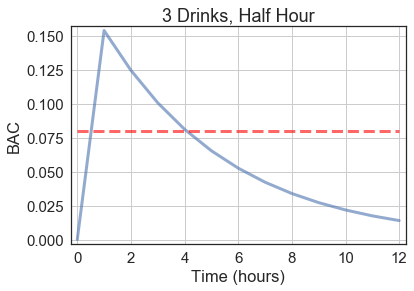

In [5]:
newfig()
plot(person.results.BAC*3)
plot([t0, t_end], [0.08, 0.08], 'r--')
decorate(title = '3 Drinks, Half Hour', xlabel='Time (hours)',
         ylabel='BAC')
plt.grid()


In [6]:
#help(decorate)

In [7]:
#plt.getp(plt.gca())

In [27]:
def run_simulation_sweep(state, system, time):
    unpack(system)
    #alc = drink*percent
    time = time
    alc = 3
    
    frame = TimeFrame(columns = init.index)
    frame.loc[t0] = init
    ts = linrange(t0, t_end-dt, dt)
    
    BAC = state.BAC

    
    for t in ts:
        
        if t < time:
            #drinking phase
            BAC += ((alc/(gender*weight*(time)))-((.2*BAC)/(BAC+1))) *(dt)
            frame.loc[t+dt] = BAC

            
        else:
            #recovery phase
            BAC += (-((.2*BAC)/(BAC+1))) * (dt)
            frame.loc[t+dt] = BAC

            
        system.results = frame


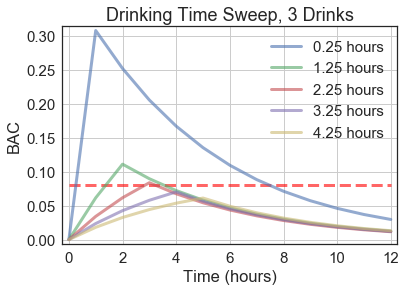

In [38]:
time_array = linrange(0.25,4.25,1)
newfig()
plot([t0, t_end], [0.08, 0.08], 'r--')


for t in time_array:
    run_simulation_sweep(init, person, t)
    plot(person.results.BAC*3, label= str(t) + ' hours')
    decorate(title = 'Drinking Time Sweep, 3 Drinks', xlabel='Time (hours)',
         ylabel='BAC')
    plt.grid()
    


In [29]:
#bac highly dependent on drinking_time, move around to get accurate 'drinks' to BAC value
#use smaller time step for more accurate results

In [11]:
%psource interpolate


In [12]:
person.results.BAC

0     0.000000
1     0.102740
2     0.084106
3     0.068590
4     0.055752
5     0.045191
6     0.036543
7     0.029492
8     0.023763
9     0.019121
10    0.015368
11    0.012341
12    0.009903
Name: BAC, dtype: float64

In [13]:
I = interpolate(person.results.BAC)
I(1)*3

0.30821917808219179

In [14]:
import numpy as np

x = [0.037.argmax()]  # Find the x value corresponding to the maximum y value
print (x)

AttributeError: 'float' object has no attribute 'argmax'

In [ ]:
import scipy.interpolate
index = linrange(0,t_end,dt)
y_interp = scipy.interpolate.interp1d(index, person.results)
print (y_interp[5])